## 支持数据分析的工具

### 使用 ChatAgent 做数据分析推理

In [1]:
from illufly.types import Dataset
import pandas as pd
from illufly.chat import ChatQwen
from illufly.toolkits import PandasAgent

p = PandasAgent(ChatQwen(), [
    Dataset(name="考试成绩", df=pd.DataFrame({
        "姓名": ["薛一凡", "肖一笑", "赖国良", "吴红兵"],
        "语文": [90, 80, 105, 110],
        "数学": [135, 110, 120, 90]
    }))
])

```python
def main():
    # 获取数据集
    exam_scores = datasets['考试成绩'].df
    
    # 筛选出赖国良的成绩
    laiguo_liang_scores = exam_scores[exam_scores['姓名'] == '赖国良']
    
    # 绘制柱状图
    plt.figure(figsize=(8, 4))
    subjects = ['语文', '数学']
    scores = laiguo_liang_scores[['语文', '数学']].values.flatten().tolist()
    plt.bar(subjects, scores, color=['blue', 'green'])
    plt.xlabel('科目')
    plt.ylabel('分数')
    plt.title('赖国良的成绩')
    plt.ylim(0, 150)
    
    for i, v in enumerate(scores):
        plt.text(i, v + 3, str(v), ha='center', va='bottom')
    
    # 显示图像
    plt.show()
    
    return laiguo_liang_scores
```


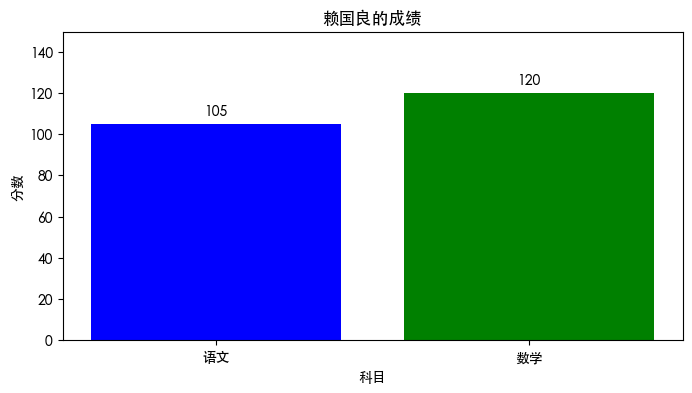

    姓名   语文   数学
2  赖国良  105  120

"import pandas as pd\nimport numpy as np\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport matplotlib.font_manager as fm\nfont_prop = fm.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')\nplt.rcParams['font.family'] = font_prop.get_name()\ndef main():\n    # 获取数据集\n    exam_scores = datasets['考试成绩'].df\n    \n    # 筛选出赖国良的成绩\n    laiguo_liang_scores = exam_scores[exam_scores['姓名'] == '赖国良']\n    \n    # 绘制柱状图\n    plt.figure(figsize=(8, 4))\n    subjects = ['语文', '数学']\n    scores = laiguo_liang_scores[['语文', '数学']].values.flatten().tolist()\n    plt.bar(subjects, scores, color=['blue', 'green'])\n    plt.xlabel('科目')\n    plt.ylabel('分数')\n    plt.title('赖国良的成绩')\n    plt.ylim(0, 150)\n    \n    for i, v in enumerate(scores):\n        plt.text(i, v + 3, str(v), ha='center', va='bottom')\n    \n    # 显示图像\n    plt.show()\n    \n    return laiguo_liang_scores\nlast_output = main()\n"

In [2]:
p("赖国良成绩如何，帮我绘制一个柱状图")
print(p.last_code)

In [4]:
print(p.last_code)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_prop = fm.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
plt.rcParams['font.family'] = font_prop.get_name()
def main():
    # 获取数据集
    exam_scores = datasets['考试成绩'].df
    
    # 筛选出赖国良的成绩
    laiguo_liang_scores = exam_scores[exam_scores['姓名'] == '赖国良']
    
    # 绘制柱状图
    plt.figure(figsize=(8, 4))
    subjects = ['语文', '数学']
    scores = laiguo_liang_scores[['语文', '数学']].values.flatten().tolist()
    plt.bar(subjects, scores, color=['blue', 'green'])
    plt.xlabel('科目')
    plt.ylabel('分数')
    plt.title('赖国良的成绩')
    plt.ylim(0, 150)
    
    for i, v in enumerate(scores):
        plt.text(i, v + 3, str(v), ha='center', va='bottom')
    
    # 显示图像
    plt.show()
    
    return laiguo_liang_scores
last_output = main()



In [3]:
print(p.agent.memory[0]['content'])

你是一个数据科学家，需要根据给定的数据集和问题生成python代码。

你必须遵循以下约束来生成python代码：
1. 代码将在受限的环境中执行，请不要尝试打开其他文件或执行写入操作，不要执行任何引入其他库的操作，这是被禁止的。
2. 你可以使用的 __builtins__ 函数已经在全局变量中：['__import__', 'abs', 'all', 'any', 'bin', 'bool', 'chr', 'str', 'complex', 'divmod', 'enumerate', 'filter', 'hex', 'isinstance', 'issubclass', 'iter', 'len', 'list', 'map', 'max', 'min', 'next', 'oct', 'ord', 'pow', 'range', 'reversed', 'round', 'sorted', 'sum', 'tuple', 'dict', 'set', 'frozenset', 'zip', 'hasattr', 'print', 'format', 'slice', 'type', 'classmethod', 'staticmethod', 'property', 'super']。
3. 你可以使用的模块和全局变量包括：['__builtins__', 'last_output', 'datasets', 'add_dataset']。
4. 生成代码时不要使用 __name__ == "__main__" 语句，这在受限环境中不被允许。
5. 必须使用使用markdown格式，用```python开头，```结尾包装并输出你的代码。
6. 你生成的脚本必须被包含在`main`函数中，并在`main`函数中将结果返回。
7. 请选择合适的数据集名称，生成对其进行处理的python代码。
8. 你可以从考试成绩中选择一个数据集，这些数据集已经保存在名为`datasets`的全局变量字典中，
   在代码中使用`datasets[数据集名称].df`引用将会返回可用的 pandas.DataFrame 类型;
   而`datasets[数据集名称].desc`将会返回数据集的描述。  
9. 如果你的处理结果是 pandas 数据框类型，可以将其添加到

```python
def main():
    # 获取考试成绩数据集
    exam_scores_df = datasets['考试成绩'].df
    
    # 创建总分列
    exam_scores_df['总分'] = exam_scores_df['语文'] + exam_scores_df['数学']
    
    # 按总分降序排序
    ranked_exam_scores_df = exam_scores_df.sort_values(by='总分', ascending=False)
    
    # 绘制条形图展示排名
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ranked_exam_scores_df['姓名'], y=ranked_exam_scores_df['总分'], palette='viridis')
    plt.title('学生考试成绩排行榜')
    plt.xlabel('学生姓名')
    plt.ylabel('总分')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # 显示图形
    plt.show()
    
    # 将新数据集添加到数据集中备用
    add_dataset(ranked_exam_scores_df, "考试成绩排行榜", "按总分排序的学生考试成绩排行榜")
    
    return ranked_exam_scores_df
```
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_prop = fm.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
plt.rcParams['font.family'] = font_prop.get_name()
def main():
    # 获取考试成绩数据集
    e

<string>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



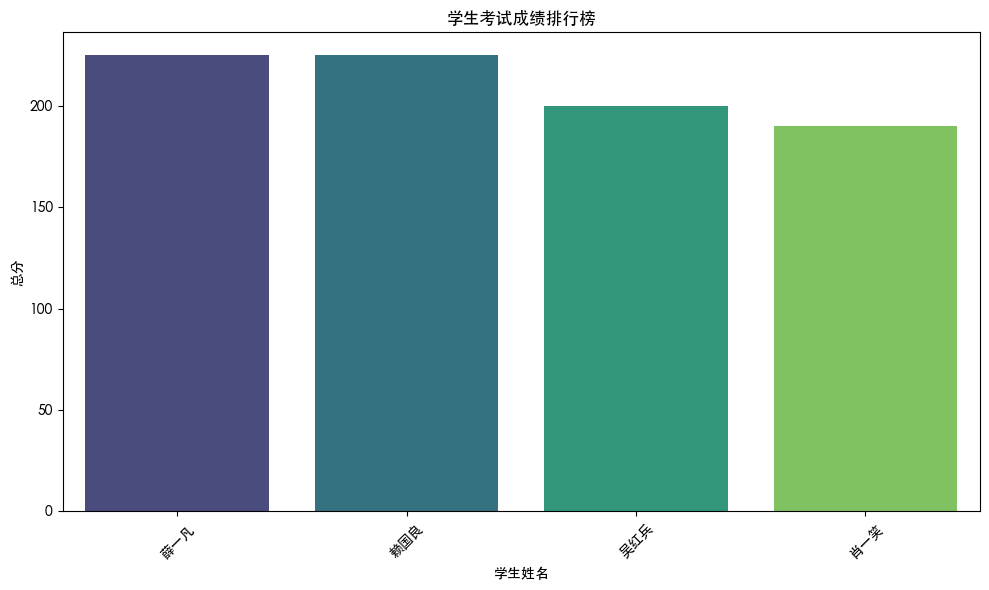

    姓名   语文   数学   总分
0  薛一凡   90  135  225
2  赖国良  105  120  225
3  吴红兵  110   90  200
1  肖一笑   80  110  190

,姓名,语文,数学,总分
0,薛一凡,90,135,225
2,赖国良,105,120,225
3,吴红兵,110,90,200
1,肖一笑,80,110,190


In [4]:
p("重新做一个榜单吧, 并绘制合适的图表")

In [5]:
p("新榜单中谁最好？")

```python
def main():
    # 使用考试成绩排行榜数据集
    leaderboard = datasets['考试成绩排行榜'].df
    
    # 获取总分最高的学生
    top_student = leaderboard.iloc[0]
    
    # 返回最好的学生的名字
    best_student = top_student['姓名']
    return best_student
```
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_prop = fm.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')
plt.rcParams['font.family'] = font_prop.get_name()
def main():
    # 使用考试成绩排行榜数据集
    leaderboard = datasets['考试成绩排行榜'].df
    
    # 获取总分最高的学生
    top_student = leaderboard.iloc[0]
    
    # 返回最好的学生的名字
    best_student = top_student['姓名']
    return best_student
last_output = main()

薛一凡

'薛一凡'

In [4]:
p("谁最偏科？")

```python
def main():
    # 获取考试成绩数据集
    exam_scores = datasets['考试成绩'].df
    
    # 计算每个学生的偏科程度，这里我们用数学和语文成绩的差值的绝对值来衡量
    exam_scores['偏科程度'] = abs(exam_scores['数学'] - exam_scores['语文'])
    
    # 找出偏科程度最高的学生
    most_biased_student = exam_scores.loc[exam_scores['偏科程度'].idxmax()]
    
    # 返回偏科程度最高的学生的名字以及偏科程度
    return {'姓名': most_biased_student['姓名'], '偏科程度': most_biased_student['偏科程度']}
```
{'姓名': '薛一凡', '偏科程度': 45}

{'姓名': '薛一凡', '偏科程度': 45}

## 作为工具使用

### openai 风格的工具回调

In [7]:
from illufly.chat import ChatQwen
from illufly.toolkits import PandasAgent
from illufly.types import Dataset
import pandas as pd

data = pd.DataFrame({
    "姓名": ["薛一凡", "肖一笑", "赖国良", "吴红兵"],
    "语文": [90, 80, 105, 110],
    "数学": [135, 110, 120, 90]
})

pan = PandasAgent(ChatQwen(), [Dataset(name="考试成绩", df=data)], name="分析师")
talker = ChatQwen(tools=[pan])

talker("请评估考试成绩，看看谁该表扬，谁该鞭策")



[FINAL_TOOLS_CALL] [{"index": 0, "id": "call_5656220f98eb4e8ba65a2c", "type": "function", "function": {"name": "PandasAgent.4972880864", "arguments": "{\"question\": \"请评估考试成绩，看看谁该表扬，谁该鞭策\", \"args\": \"\", \"kwargs\": \"\"}"}}]
[AGENT] PandasAgent.4972880864
```python
def main():
    exam_scores = datasets['考试成绩'].df
    
    # 定义表扬和鞭策的标准
    praise_threshold = 100  # 成绩超过100分的学生将获得表扬
    encourage_threshold = 80  # 成绩低于80分的学生需要鞭策

    # 创建新的列来表示表扬和鞭策
    exam_scores['评价'] = exam_scores.apply(
        lambda row: '表扬' if (row['语文'] >= praise_threshold or row['数学'] >= praise_threshold) 
                    else ('鞭策' if (row['语文'] < encourage_threshold or row['数学'] < encourage_threshold) 
                          else '保持'), axis=1)
    
    # 将更新后的数据框添加回数据集中
    add_dataset(exam_scores, "考试成绩_评价", "对考试成绩进行了表扬和鞭策的评价")
    
    return exam_scores
```
    姓名   语文   数学  评价
0  薛一凡   90  135  表扬
1  肖一笑   80  110  表扬
2  赖国良  105  120  表扬
3  吴红兵  110   90  表扬
根据设定的表扬（任一科目成绩大于等于100分）和鞭策（任一科

'根据设定的表扬（任一科目成绩大于等于100分）和鞭策（任一科目成绩小于80分）标准，所有学生的表现如下：\n\n- **表扬**：\n  - 薛一凡\n  - 肖一笑\n  - 赖国良\n  - 吴红兵\n  \n以上同学在至少一个科目上表现优异，值得表扬。\n\n- **鞭策**：\n  - 没有学生在两个科目中的成绩都低于80分，因此没有学生被特别指出需要鞭策。但可以鼓励所有未达到表扬标准的同学继续努力，争取更好的成绩。 \n\n希望这些信息对您有所帮助！'

### ReAct

In [3]:
from illufly.flow import ReAct
from illufly.chat import ChatQwen
from illufly.toolkits import PandasAgent
from illufly.types import Dataset
import pandas as pd


data = pd.DataFrame({
    "姓名": ["薛一凡", "肖一笑", "赖国良", "吴红兵"],
    "语文": [90, 80, 105, 110],
    "数学": [135, 110, 120, 90]
})

pan = PandasAgent(ChatQwen(), [Dataset(name="考试成绩", df=data)], name="分析师")
talker = ReAct(ChatQwen(name="班主任", tools=[pan]))

talker.planner.get_tools_desc()

[{'type': 'function',
  'function': {'name': '分析师',
   'description': '回答关于[考试成绩]等数据集的相关问题。\n这些数据集具体包括：- 考试成绩: 关于`考试成绩`的数据集',
   'parameters': {'type': 'object',
    'properties': {'question': {'type': 'string',
      'description': '细致描述数据分析任务的需求描述'}},
    'required': ['question']}}}]

In [4]:
talker("请评估考试成绩，看看谁该表扬，谁该鞭策")

[AGENT] >>> Node 1: planner
**思考** 

1. 任务中是否包含关键概念: 任务中涉及的组合型概念或实体。已经明确获得取值的关键概念，将其取值完整备注在概念后。
   - 考试成绩
   - 表扬标准
   - 鞭策标准

2. 将任务中的关键概念拆解为一系列待查询的子要素：每个关键概念一行，后接这个概念的子要素，每个子要素一行，行前以' -'开始。
   - 考试成绩
     - 学生姓名
     - 各科目分数
     - 总分
     - 平均分
   - 表扬标准
     - 成绩排名前X%
     - 单科成绩超过Y分
   - 鞭策标准
     - 成绩排名后Z%
     - 单科成绩低于W分

3. 观察以前的执行记录：思考概念拆解是否完整、准确？每个关键概念或要素的查询都得到了准确的结果？从当前的信息中还不能得到哪些要素/概念？
   - 当前信息中没有具体的考试成绩数据，也没有明确的表扬与鞭策的具体标准（如X%、Y分、Z%、W分）。因此，需要先获取这些信息才能进一步评估。

**行动** 

Step1: 获取考试成绩数据集详情，以便了解学生的表现情况。#E1 = 分析师[{"question": "请提供考试成绩的数据集，包括学生姓名、各科目分数、总分和平均分。"}]
[AGENT] 分析师
```python
def main():
    # 获取考试成绩数据集
    exam_scores = datasets["考试成绩"].df
    
    # 计算总分和平均分
    exam_scores['总分'] = exam_scores['语文'] + exam_scores['数学']
    exam_scores['平均分'] = exam_scores['总分'] / 2
    
    # 添加新数据集
    add_dataset(exam_scores, "考试成绩_含总分和平均分", "考试成绩数据集，增加了总分和平均分列")
    
    return exam_scores
```
    姓名   语文   数学   总分    平均分
0  薛一凡   90  135  225  112.5
1  肖一笑   80  110  190   95.0
2  

'根据提供的考试成绩数据和设定的表扬与鞭策标准：\n\n- **应表扬的学生**：\n  - 单科成绩超过120分的学生：薛一凡（数学135分）\n\n- **应鞭策的学生**：\n  - 成绩排名后20%的学生：肖一笑（总分190，平均分95.0）\n  - 单科成绩低于80分的学生：无\n\n以上即为本次评估的结果。'

## 在写作中结合数据处理

### 单轮写作

In [8]:
from illufly.llm import qwen, fake_llm
from illufly.agent import Agent
from illufly.io import log
import pandas as pd

a = Agent(qwen)

a.add_dataset(
    "中秋名单",
    pd.DataFrame({
        "姓名": ["薛一凡", "肖一笑", "赖国良", "吴红兵"],
        "月饼数量": [2, 2, 1, 1]
    })
)

a.add_dataset(
    "考试成绩",
    pd.DataFrame({
        "姓名": ["薛一凡", "肖一笑", "赖国良", "吴红兵"],
        "语文": [90, 80, 105, 110],
        "数学": [135, 110, 120, 90]
    })
)

log(a, "请查询工具，针对这几个孩子的实际考试成绩，帮我写一份报告", template="OUTLINE")

[TOOLS_CALL_CHUNK] {"index": 0, "id": "call_f35cc3756f604157a2223a", "type": "function", "function": {"name": "python_code", "arguments": ""}}
[TOOLS_CALL_CHUNK] {"index": 0, "id": "", "type": "function", "function": {"arguments": "{\"question\": \"查询"}}
[TOOLS_CALL_CHUNK] {"index": 0, "id": "", "type": "function", "function": {"arguments": "几个孩子的实际考试成绩\"}"}}
[TOOLS_CALL_CHUNK] {"index": 0, "id": "", "type": "function", "function": {}}
[TOOLS_CALL_CHUNK] {"index": 0, "id": "", "type": "function", "function": {}}
[TOOLS_CALL_FINAL] {"0": {"index": 0, "id": "call_f35cc3756f604157a2223a", "type": "function", "function": {"name": "python_code", "arguments": "{\"question\": \"查询几个孩子的实际考试成绩\"}"}}}
```python
def main():
    # 由于问题没有具体说明要查询哪些孩子的成绩以及需要什么样的处理，
    # 这里我们做一个基本的假设：查询所有孩子的语文和数学成绩。
    # 如果有具体需求，请提供更详细的问题描述。

    # 使用pandas库读取考试成绩数据集
    exam_scores = data['考试成绩'].df
    
    # 返回所有孩子的语文和数学成绩
    return exam_scores[['姓名', '语文', '数学']]
```

[TOOL_RESP_FINAL] 
| 姓名   |   语文 |   数学 |
|

'# 学生考试成绩分析报告\n\n## 一、成绩概览\n\n### 成绩统计\n\n<OUTLINE>\n扩写摘要: 对学生的语文与数学成绩进行整体概括，列出平均分、最高分、最低分。\n\n扩写要求:\n- 计算并列举所有学生的语文和数学成绩的平均分。\n- 高出平均分最多的学生及其分数。\n- 低于平均分最多的学生及其分数。\n- 预估字数：150字\n</OUTLINE>\n\n## 二、个体成绩分析\n\n### 薛一凡\n\n<OUTLINE>\n扩写摘要: 分析薛一凡同学的成绩表现，与班级平均成绩对比。\n\n扩写要求:\n- 对比薛一凡的语文和数学成绩与班级相应科目的平均成绩。\n- 点评薛一凡成绩的优势科目及提升空间。\n- 预估字数：100字\n</OUTLINE>\n\n### 肖一笑\n\n<OUTLINE>\n扩写摘要: 评估肖一笑同学的学习情况，提出针对性建议。\n\n扩写要求:\n- 指出肖一笑成绩相对薄弱的科目。\n- 给出提高该科目成绩的具体建议。\n- 预估字数：100字\n</OUTLINE>\n\n### 赖国良\n\n<OUTLINE>\n扩写摘要: 分析赖国良的成绩分布，探讨其学习策略的有效性。\n\n扩写要求:\n- 分析赖国良在两门科目上的表现是否均衡。\n- 探讨赖国良维持或提升成绩可能采取的策略。\n- 预估字数：100字\n</OUTLINE>\n\n### 吴红兵\n\n<OUTLINE>\n扩写摘要: 评价吴红兵的成绩波动，提出平衡发展的重要性。\n\n扩写要求:\n- 说明吴红兵成绩的显著差异（高分与低分科目）。\n- 强调平衡各科学习的必要性，并提供策略。\n- 预估字数：100字\n</OUTLINE>\n\n## 三、总体建议与总结\n\n<OUTLINE>\n扩写摘要: 综合所有学生的表现，提出班级整体提升学习效率的方法。\n\n扩写要求:\n- 总结学生们的共性问题和个别亮点。\n- 提出适用于全班的一般性学习策略和方法。\n- 预估字数：150字\n</OUTLINE>'